In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# For this lab, we still keep using the `marketing_customer_analysis.csv` file. You can find the file in the `files_for_lab` folder.
file1 = pd.read_csv("C:/Users/igrav/Desktop/ironhack/Lecture/Week_1/Day5/AM/lab-customer-analysis-round-7-master/lab-customer-analysis-round-7-master/files_for_lab/csv_files/marketing_customer_analysis.csv")
file1.head(5)


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
numerical = file1.select_dtypes(["int", "float"])
numerical.head(5)
categorical = file1.select_dtypes(["object"])
categorical = categorical.drop(["Customer", "State", "Effective To Date"], axis=1)
categorical.head()

,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


In [4]:
numerical.describe().T


,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [5]:
# Normalize (numerical).
from sklearn.preprocessing import MinMaxScaler 
MinMaxtransformer = MinMaxScaler()
MinMaxtransformer.fit(numerical) 
N_normalized = MinMaxtransformer.transform(numerical) 
N_normalized = pd.DataFrame(N_normalized,columns=numerical.columns) 
N_normalized.head(5)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710


In [6]:
N_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,0.074999,0.084382,0.0,0.025744,0.047677,0.086754,1.0
Income,9134.0,0.376645,0.303857,0.0,0.000000,0.338959,0.623318,1.0
Monthly Premium Auto,9134.0,0.135946,0.145181,0.0,0.029536,0.092827,0.202532,1.0
Months Since Last Claim,9134.0,0.431343,0.287807,0.0,0.171429,0.400000,0.657143,1.0
Months Since Policy Inception,9134.0,0.485501,0.281879,0.0,0.242424,0.484848,0.717172,1.0
Number of Open Complaints,9134.0,0.076878,0.182077,0.0,0.000000,0.000000,0.000000,1.0
Number of Policies,9134.0,0.245771,0.298773,0.0,0.000000,0.125000,0.375000,1.0
Total Claim Amount,9134.0,0.150006,0.100410,0.0,0.094071,0.132675,0.189212,1.0


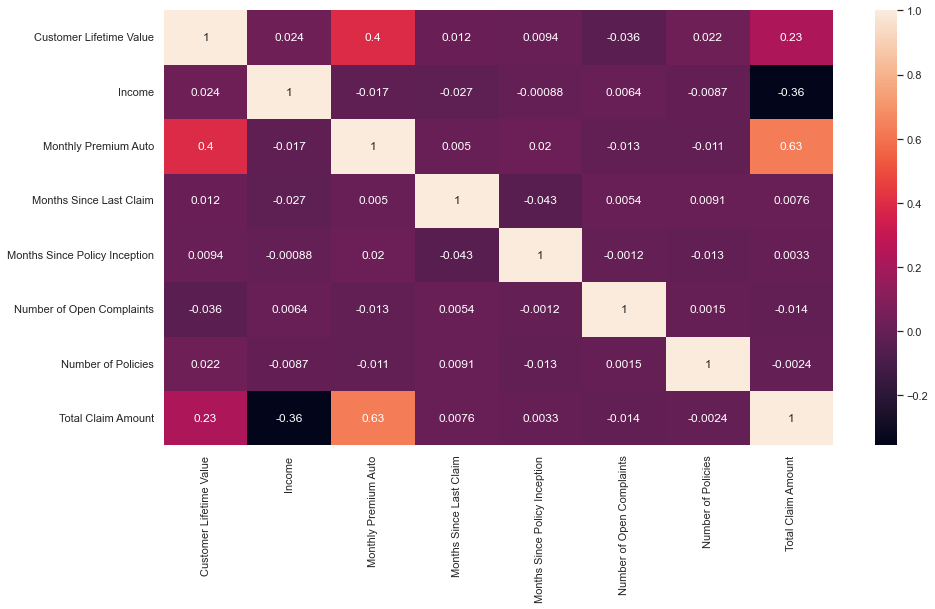

In [7]:
corr_matrix = numerical.corr()
sns.set(rc={'figure.figsize':(15,8)})
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [8]:
cat = pd.get_dummies(categorical, categorical.columns, drop_first=True)
display(cat)
print(cat.shape)
file2 = pd.concat([N_normalized, cat], axis = 1)
file2

,Response_Yes,Coverage_Extended,Coverage_Premium,Education_College,Education_Doctor,Education_High School or Below,Education_Master,EmploymentStatus_Employed,EmploymentStatus_Medical Leave,EmploymentStatus_Retired,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,1,1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
9131,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9132,0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


(9134, 39)


,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Response_Yes,Coverage_Extended,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0.132974,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0.391051,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0.195764,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0.183117,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0.047710,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,0.264137,0.719547,0.050633,0.514286,0.898990,0.0,0.125,0.068485,0,0,...,0,0,1,0,0,0,0,0,1,0
9130,0.014719,0.216081,0.075949,0.400000,0.282828,0.0,0.000,0.131034,1,1,...,1,0,0,0,0,0,0,0,1,0
9131,0.076951,0.000000,0.101266,0.257143,0.373737,0.6,0.125,0.273297,0,1,...,1,0,0,0,0,0,0,0,1,0
9132,0.069098,0.219452,0.147679,0.971429,0.030303,0.0,0.250,0.238876,0,1,...,1,0,0,0,0,0,0,0,0,0


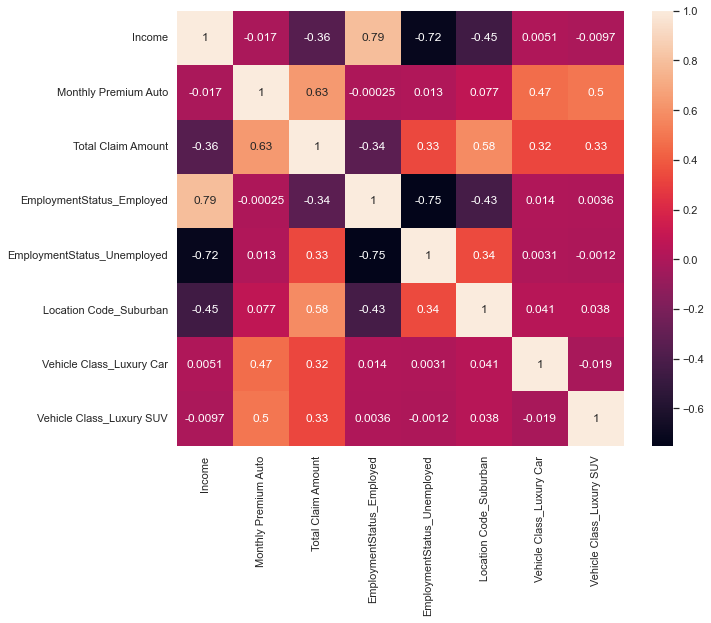

(9134, 47)

In [9]:

cf = 0.3

columns = []
corr_matrix = file2.corr()

for col in file2.columns:
        if abs(corr_matrix.loc[col,'Total Claim Amount']) >= cf:
            columns.append(col)
numerical_trimmed = pd.DataFrame(file2, columns=columns)
corr_matrix2 = numerical_trimmed.corr()
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(corr_matrix2, annot=True)
plt.show()

file2.shape

In [10]:
# X-y split
y = file2['Total Claim Amount']
X = file2.drop(['Total Claim Amount'], axis=1)
X.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Response_Yes,Coverage_Extended,Coverage_Premium,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.0,0.000,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.0,0.875,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.0,0.125,0,0,1,...,0,0,0,0,0,0,0,1,1,0
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.0,0.750,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.0,0.000,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6393, 46)
(2741, 46)
(6393,)
(2741,)


In [13]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from math import sqrt

In [14]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)
r2_train = r2_score(y_pred_train, y_train)
r2_test = r2_score(y_pred_test, y_test)
mse_train = mean_squared_error(y_pred_train, y_train)
mse_test = mean_squared_error(y_pred_test, y_test)
mae_train = mean_absolute_error(y_pred_train, y_train)
mae_test = mean_absolute_error(y_pred_test, y_test)
RMSE_train = sqrt(mean_absolute_percentage_error(y_pred_train, y_train))
RMSE_test = sqrt(mean_absolute_percentage_error(y_pred_test, y_test))

print("R2 score of trained dataset is", r2_train)
print("R2 score of test dataset is", r2_test)
print("MSE of trained dataset is", mse_train)
print("MSE of test dataset is", mse_test)
print("MAE of train dataset is", mae_train)
print("MAE of test dataset is", mae_test)
print("RMSE of train dataset is", RMSE_train)
print("RMSE of test dataset is", RMSE_test)
print(lm.intercept_)
print(lm.coef_)

R2 score of trained dataset is 0.7080993680654346
R2 score of test dataset is 0.7022325629570715
MSE of trained dataset is 0.002309491628759091
MSE of test dataset is 0.002288266878044382
MAE of train dataset is 0.03300545213937894
MAE of test dataset is 0.0326427970177167
RMSE of train dataset is 1.279492517470551
RMSE of test dataset is 0.9929787449009292
-0.004074468991250052
[ 0.01243097 -0.00913873  0.37927819  0.00279882 -0.00043633 -0.00166292
 -0.00057257 -0.00787382 -0.00182812  0.00273187 -0.00271907 -0.00751607
  0.00186042 -0.0034969  -0.00151385  0.00753547 -0.00171617  0.02427116
  0.00453091  0.13115593  0.07568203 -0.00191089  0.02303507 -0.00204739
  0.004799   -0.00294762 -0.00344996  0.00063168 -0.00159505 -0.00108403
  0.01549982 -0.00467683 -0.00602398  0.00639299  0.00311253  0.00162947
 -0.00143645 -0.00235804  0.00120962  0.04198776  0.0208051   0.00308769
 -0.0030503   0.00131133 -0.00424517 -0.00242929]
